In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel(r"C:\Users\HP\OneDrive\Documents\E-commerce.xlsx")

In [3]:
df.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [4]:
df.shape  

(2025, 13)

In [5]:
df.nunique()

server_time        1715
device_type           1
user_id            1840
session_id          717
item_id             976
item_price          937
category             16
product_type       1101
impression_time     850
app_code            138
os_version            3
is_4G                 2
is_click              2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   server_time      2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2022 non-null   float64       
 3   session_id       2024 non-null   float64       
 4   item_id          2023 non-null   float64       
 5   item_price       2024 non-null   float64       
 6   category         2019 non-null   float64       
 7   product_type     2024 non-null   float64       
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2024 non-null   float64       
 10  os_version       2016 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 205.8+ KB


In [7]:
df.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2022.000000,2.024000e+03,2023.000000,2024.000000,2019.000000,2024.000000,2024.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63505.154721,6661.115119,10.290738,5359.607213,244.741107,0.342222,0.049877
std,26401.598808,3.108620e+05,36830.177344,17296.372880,4.961514,3076.114288,124.477650,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33845.500000,1465.000000,7.000000,2758.750000,190.000000,0.000000,0.000000
50%,46248.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,0.000000,0.000000
75%,69375.500000,7.996875e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


#### handling missing values

In [8]:
df.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

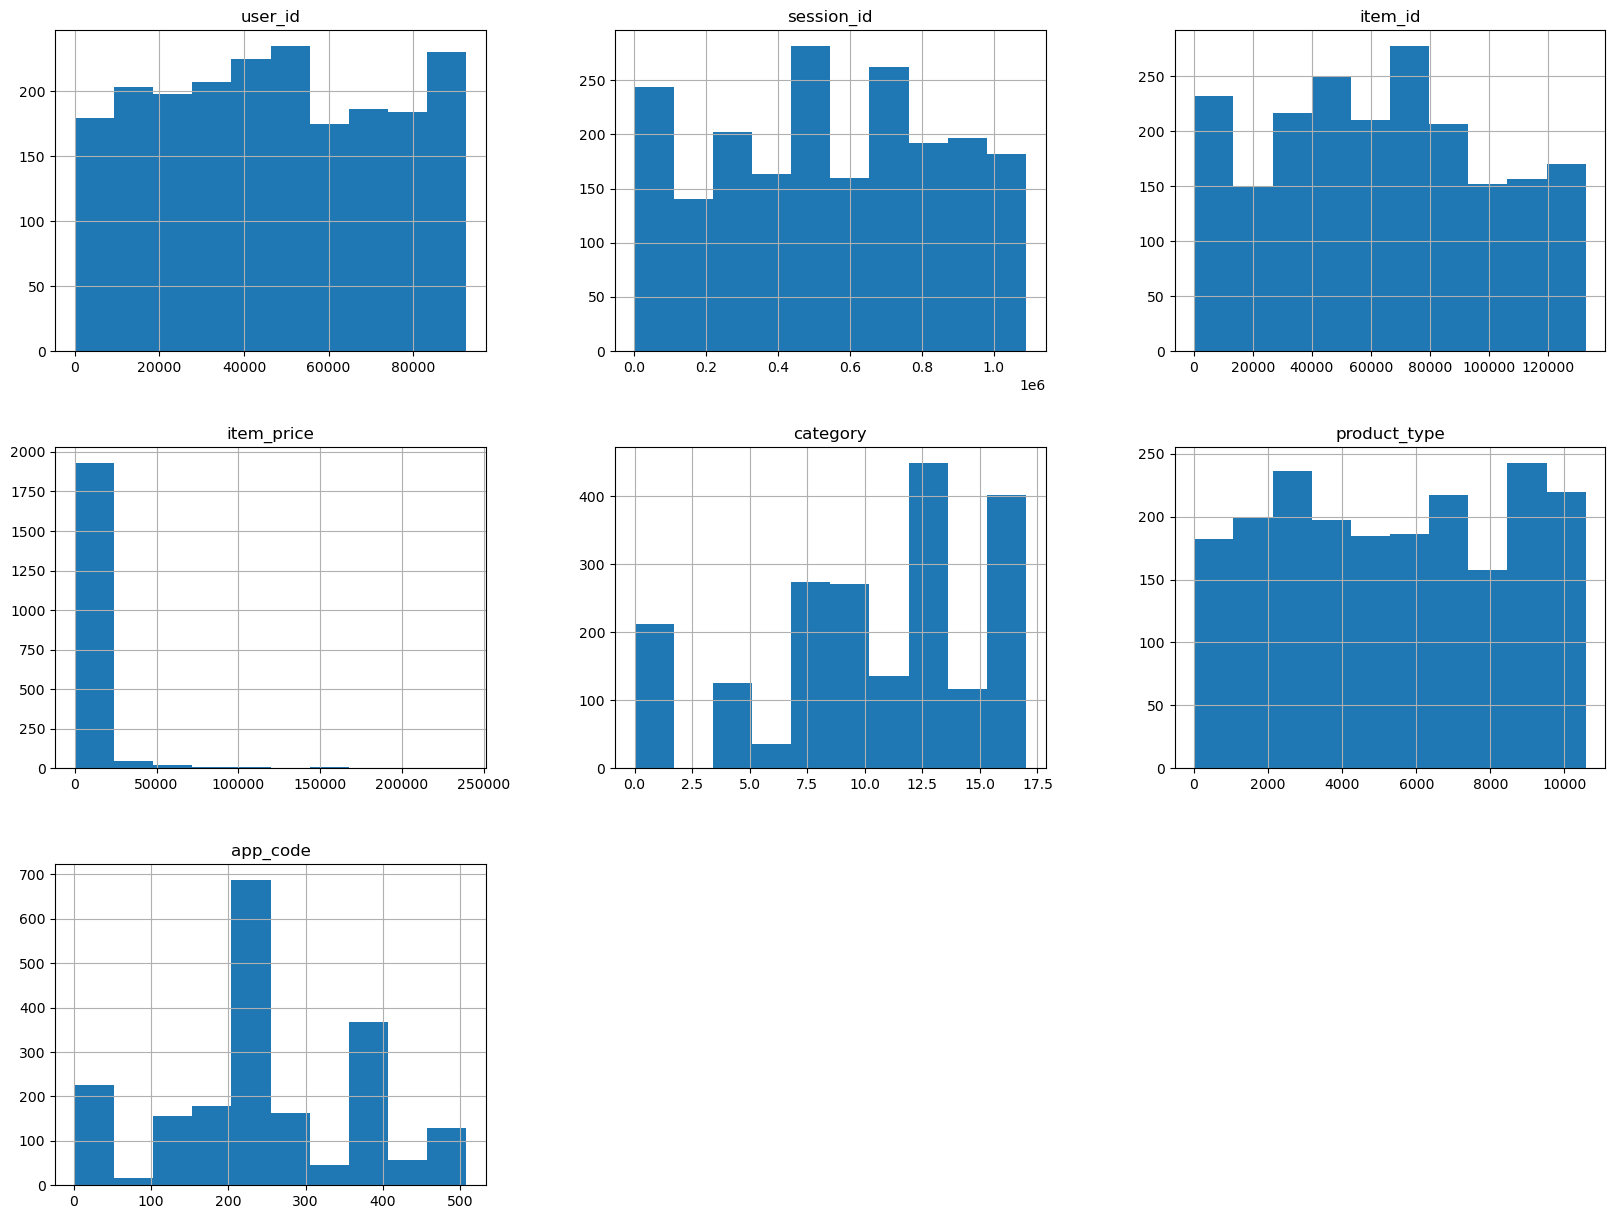

In [9]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
for col in ['user_id','session_id','item_id','item_price','category','product_type','app_code']:
    df[col]=df[col].fillna(df[col].median())

In [11]:
df['os_version'].mode()

0    latest
Name: os_version, dtype: object

In [45]:
df['os_version']= df['os_version'].fillna(df['os_version'].mode())

In [46]:
df.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

#### Handling outliers

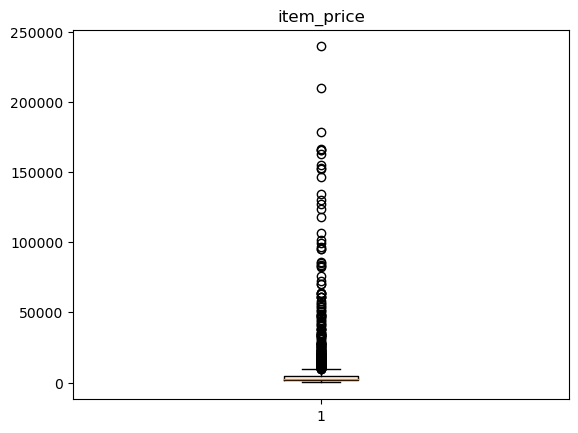

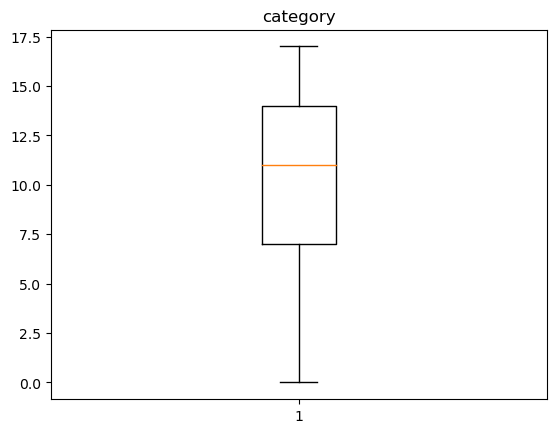

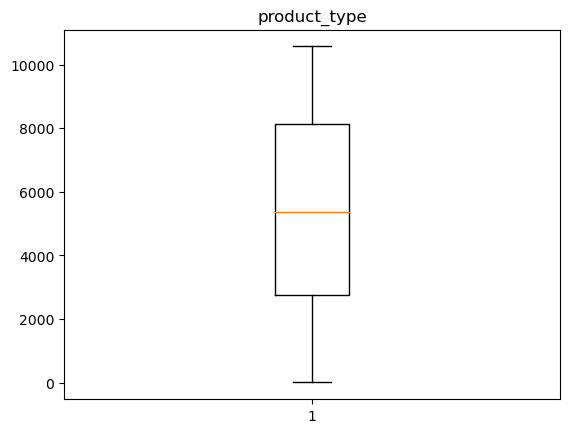

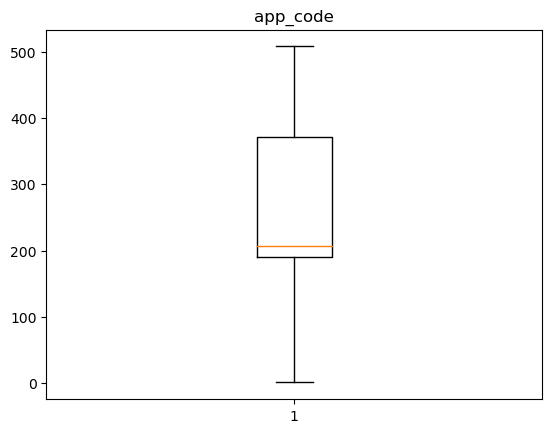

In [14]:
num_cols = ['item_price','category','product_type','app_code']
for i in num_cols:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [15]:
Q1= np.percentile(df['item_price'],25,interpolation='midpoint')
Q2= np.percentile(df['item_price'],50,interpolation='midpoint')
Q3= np.percentile(df['item_price'],75,interpolation='midpoint')

C:\Users\HP\AppData\Local\Temp\ipykernel_10008\502324392.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(df['item_price'],25,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_10008\502324392.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2= np.percentile(df['item_price'],50,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_10008\502324392.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or

In [16]:
print(Q1)
print(Q2)
print(Q3)

1465.0
2425.0
4793.0


In [17]:
IQR= Q3-Q1

In [18]:
print(IQR)

3328.0


In [19]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [20]:
print(up_lim)
print(low_lim)

9785.0
-3527.0


In [21]:
outliers = []
for x in df['item_price']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [22]:
ind1 = df['item_price']>up_lim
l1= df.loc[ind1].index.tolist()
print(l1)

[6, 7, 31, 34, 49, 51, 63, 68, 74, 86, 90, 107, 110, 113, 114, 122, 127, 138, 146, 161, 176, 179, 184, 191, 228, 242, 290, 294, 314, 325, 328, 352, 353, 368, 370, 386, 399, 419, 423, 428, 442, 447, 453, 458, 463, 464, 465, 467, 471, 472, 475, 478, 481, 493, 512, 538, 543, 561, 577, 581, 584, 595, 596, 598, 600, 603, 610, 639, 643, 644, 651, 663, 664, 669, 679, 688, 713, 715, 722, 726, 732, 736, 752, 767, 778, 800, 801, 840, 846, 849, 859, 865, 888, 900, 912, 925, 929, 942, 949, 953, 962, 970, 977, 984, 985, 992, 1000, 1013, 1024, 1025, 1033, 1035, 1037, 1057, 1060, 1063, 1065, 1106, 1113, 1121, 1132, 1140, 1146, 1151, 1157, 1166, 1168, 1182, 1198, 1199, 1204, 1206, 1213, 1238, 1248, 1257, 1264, 1267, 1272, 1278, 1281, 1298, 1305, 1320, 1325, 1327, 1329, 1342, 1359, 1373, 1374, 1376, 1386, 1387, 1393, 1396, 1419, 1424, 1426, 1432, 1445, 1446, 1451, 1455, 1460, 1487, 1488, 1490, 1503, 1511, 1520, 1529, 1535, 1542, 1551, 1556, 1560, 1572, 1580, 1584, 1585, 1586, 1592, 1594, 1599, 1606, 16

In [23]:
df.drop([6,7,31,34,49,51,63,68, 74, 86, 90, 107, 110, 113, 114, 122, 127, 138, 146, 161, 176, 179, 184, 191, 228, 242, 290, 294, 314, 325, 328, 352, 353, 368, 370, 386, 399, 419, 423, 428, 442, 447, 453, 458, 463, 464, 465, 467, 471, 472, 475, 478, 481, 493, 512, 538, 543, 561, 577, 581, 584, 595, 596, 598, 600, 603, 610, 639,643, 644, 651, 663, 664, 669, 679, 688, 713, 715, 722,726,732,736,752,767,778,800,801,840, 846, 849, 859, 865, 888, 900, 912, 925, 929, 942, 949, 953, 962, 970, 977, 984, 985, 992, 1000, 1013,1024, 1025, 1033, 1035, 1037, 1057, 1060, 1063, 1065, 1106, 1113, 1121, 1132, 1140, 1146, 1151, 1157, 1166, 1168, 1182, 1198, 1199, 1204, 1206, 1213, 1238, 1248, 1257, 1264, 1267, 1272, 1278,1281,1298, 1305, 1320, 1325,1327, 1329, 1342, 1359, 1373, 1374, 1376, 1386, 1387, 1393, 1396, 1419, 1424, 1426, 1432, 1445, 1446, 1451, 1455, 1460, 1487, 1488, 1490, 1503, 1511, 1520, 1529, 1535, 1542, 1551, 1556, 1560, 1572, 1580, 1584, 1585, 1586, 1592, 1594, 1599, 1606, 1613, 1632, 1636, 1641, 1644, 1646, 1661, 1670, 1673, 1678, 1695, 1697, 1699, 1709, 1722, 1723, 1724, 1726, 1741, 1743, 1746, 1756, 1769, 1780, 1789, 1790, 1803, 1804, 1805, 1808, 1810, 1813, 1827, 1829, 1832, 1837, 1856, 1857, 1858, 1860, 1861, 1865, 1866, 1868, 1869, 1877, 1879, 1882, 1885, 1933, 1937, 1948, 1953, 1961, 1978, 1981,1983, 1998, 2012],inplace=True)

In [24]:
df.shape

(1780, 13)

#### One Hot Encoding

In [26]:
df1= pd.get_dummies(df)

In [27]:
df1.shape

(1780, 15)

In [25]:
df.dtypes

server_time        datetime64[ns]
device_type                object
user_id                   float64
session_id                float64
item_id                   float64
item_price                float64
category                  float64
product_type              float64
impression_time    datetime64[ns]
app_code                  float64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [36]:
df['device_type'].nunique()

1

In [37]:
df['os_version'].nunique()

3

In [39]:
df2= df.drop('device_type', axis=1)

In [40]:
df2.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [41]:
df2 = pd.get_dummies(df2)

In [42]:
df2.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,0,1,0


#### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df['os_version'] = le.fit_transform(df['os_version'])

In [44]:
df.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,2,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,0,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,1,0,0


#### Standard Scaling

In [29]:
X = df.drop('item_price',axis=1)
y = df['item_price']

In [30]:
X.describe()

,user_id,session_id,item_id,category,product_type,app_code,is_4G,is_click
count,1780.000000,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,46729.493820,5.467858e+05,63532.398876,10.260112,5367.814888,244.198876,0.342697,0.048315
std,26387.962825,3.087378e+05,36639.606662,4.840605,3077.228646,124.634935,0.474744,0.214490
min,10.000000,1.694000e+03,176.000000,0.000000,8.000000,1.000000,0.000000,0.000000
25%,24882.250000,2.738070e+05,34687.000000,7.000000,2739.500000,190.000000,0.000000,0.000000
50%,46148.000000,5.440370e+05,63579.500000,11.000000,5403.000000,207.000000,0.000000,0.000000
75%,69426.000000,7.992640e+05,90815.000000,13.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


In [31]:
X1 = pd.DataFrame(X, columns=['category','product_type','app_code'])

In [32]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

In [33]:
X1 = std_scl.fit_transform(X1)

In [34]:
X1 = pd.DataFrame(X1, columns=['category','product_type','app_code'])

In [35]:
X1.describe()

,category,product_type,app_code
count,1.780000e+03,1.780000e+03,1.780000e+03
mean,1.097749e-16,2.594679e-17,9.181170e-17
std,1.000281e+00,1.000281e+00,1.000281e+00
min,-2.120188e+00,-1.742256e+00,-1.951838e+00
25%,-6.736820e-01,-8.543575e-01,-4.349832e-01
50%,1.528932e-01,1.143724e-02,-2.985465e-01
75%,5.661808e-01,8.949477e-01,1.017666e+00
max,1.392756e+00,1.691993e+00,2.117185e+00


#### Min Max Scaling

In [47]:
X = df.drop('item_price',axis=1)
y = df['item_price']

In [50]:
X.describe()

,user_id,session_id,item_id,category,product_type,app_code,os_version,is_4G,is_click
count,1780.000000,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,46729.493820,5.467858e+05,63532.398876,10.260112,5367.814888,244.198876,0.997191,0.342697,0.048315
std,26387.962825,3.087378e+05,36639.606662,4.840605,3077.228646,124.634935,0.698101,0.474744,0.214490
min,10.000000,1.694000e+03,176.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000
25%,24882.250000,2.738070e+05,34687.000000,7.000000,2739.500000,190.000000,1.000000,0.000000,0.000000
50%,46148.000000,5.440370e+05,63579.500000,11.000000,5403.000000,207.000000,1.000000,0.000000,0.000000
75%,69426.000000,7.992640e+05,90815.000000,13.000000,8121.000000,371.000000,1.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,17.000000,10573.000000,508.000000,3.000000,1.000000,1.000000


In [51]:
X2 = pd.DataFrame(X, columns=['category','product_type','app_code'])

In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [53]:
X2 = min_max.fit_transform(X2)

In [55]:
X2= pd.DataFrame(X2, columns=['category','product_type','app_code'])

In [56]:
X2.describe()

,category,product_type,app_code
count,1780.000000,1780.000000,1780.000000
mean,0.603536,0.507318,0.479682
std,0.284741,0.291266,0.245828
min,0.000000,0.000000,0.000000
25%,0.411765,0.258542,0.372781
50%,0.647059,0.510648,0.406312
75%,0.764706,0.767913,0.729783
max,1.000000,1.000000,1.000000
